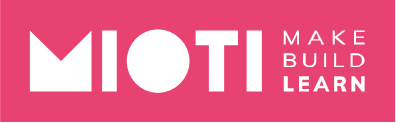
<br/>
<center style="color:#888">Módulo Data Science Advanced<br/>Asignatura Computer Vision</center>
<center style="color:#aaa; margin-top:10px;">Prof. Óscar Picazo Montoya<br>oscarpm@faculty.mioti.es</center>


# Worksheet S3: Análisis de blobs

## Objetivos

El objetivo de este worksheet es continuar aprendiendo técnicas básicas de manipulación de imágenes. En este caso análisis de blobs.

Para utilizar este worksheet deberás tener instaladas las bibliotecas del worksheet anterior y adicionalmente:

* `ipywidgets`

Es importante que una vez instalado el paquete reinicies el kernel para que coja los cambios.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage.color import rgb2gray

from ipywidgets import interactive, IntSlider, FloatSlider

import warnings
warnings.filterwarnings("ignore")

In [27]:
#!pip list

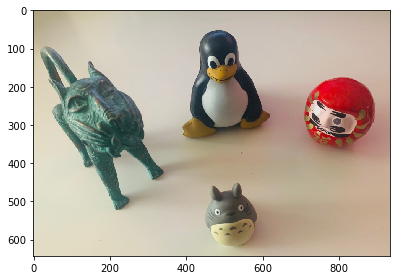

In [3]:
img = io.imread("img/figuras.jpg")
io.imshow(img)
io.show()

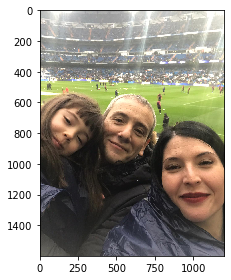

In [28]:
img2 = io.imread("img/test.jpg")
io.imshow(img2)
io.show()

## Binarización

Otros filtros clásicos son los filtros de binarización. Estos filtros nos convierten una imagen en escala de grises en una imagen en espacio de color monocromo (blanco y negro).

<div style="background-color:#FFFFCC; padding: 10px; margin:10px; border-radius:10px">
⚠️ La mayor parte de gente cuando habla de una imagen en blanco y negro habla de una imagen en escala de grises. En visión por computador cuando hablamos blanco y negro nos referimos a monocromo: Una imagen cuyos valores son 0 o 1.*
</div>

### Umbral fijo

El filtro más basico de binarización es el denominado `umbral_fijo` que basicamente 

$$
pixel(x,y) > umbral \implies 1 \\
pixel(x,y) <= umbral \implies 0
$$

Una implementación un algoritmo de binarización básico es la siguiente:

In [29]:
def umbral_fijo(img, umbral):
    """Binariza una imagen en escala de grises a partir de un umbral"""
    return img > umbral

Si aplicamos este filtro a la imagen obtenida después de aplicar el filtro de sobel podemos ver el resultado:

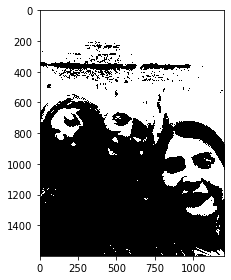

In [30]:
img_gray = rgb2gray(img2)
img_mono = umbral_fijo(img_gray, 0.5)
#io.imshow(img_mono)
io.imshow(img_mono.astype(float), cmap=plt.cm.gray) # Recibe una matriz de booleanos, por eso hay que poner astype(float) y cmap = escala de grises 
io.show()

Y podemos ver en la matriz que efectivamente los valores son monocromos:

In [6]:
img_mono

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Podemos jugar con los distintos umbrales del filtro:

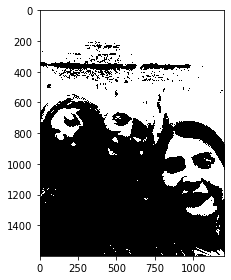

In [31]:
def filter_binarization(value):
    io.imshow(umbral_fijo(img_gray, value).astype(float), cmap=plt.cm.gray)
    io.show()
    
slider = FloatSlider(min=0, max=1, step=0.05, value=0.5, continuous_update=False)
interactive(filter_binarization, value=slider)

### Algoritmo de Otsu

El algoritmo de Otsu (https://es.wikipedia.org/wiki/M%C3%A9todo_del_valor_umbral#M%C3%A9todo_de_Otsu) nos proporciona una forma automatizada de obtener el umbral de binarización basado en un análisis estadístico.

El algoritmo se basa en utilizar como umbral de corte el punto máximo en el que la variación interna entre clases es máxima:

<img src="img/Otsu's_Method_Visualization.gif">

Piénsalo de la siguiente manera, encontrar el punto de corte óptimo es encontrar el punto en el que las dos distribuciones: blanco y negro se maxima la diferencia entre ellas a la vez que se minimiza la variación interna.

En `sklearn` este algoritmo está dispone como `threshold_otsu` y podemos utilizarlo de la siguiente forma:

In [32]:
from skimage.filters import threshold_otsu

umbral_otsu = threshold_otsu(img_gray)
umbral_otsu

0.462890625

Una vez calculado podemos aplicarlo con el mismo método anterior:

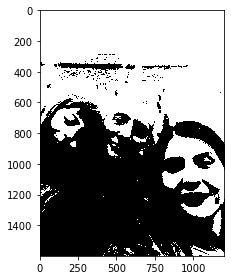

In [33]:
img_mono = umbral_fijo(img_gray, umbral_otsu)
io.imshow(img_mono.astype(float), cmap=plt.cm.gray)
io.show()

### Preguntas

* ¿Piensas que es posible encontrar un umbral que segmente perfectamente las figuras anteriores?
* ¿Crees que el algoritmo de Otsu nos proporcionaría ese umbral?

## Operadores morfológicos

Sabiendo que es muy díficil encontrar un umbral que sea capaz de segmentar de forma perfecta una imagen vamos a ver otras técnicas que podemos aplicar, en concreto los operadores morfológicos.

Los operadores morfológicos son una familia de filtros capaces de modificar una imagen mediante operaciones básicas. Vamos a verlas:

### Erosión $\ominus$

El operador erosión ($\ominus$) nos permite "erosionar" las zonas blancas de la imagen y funciona de la siguiente manera:

Supongamos que tenemos una imagen con la figura de la izquierda y un elemento estructurante (otra matriz) como la figura de la derecha:
<pre>
    1 1 1 1 1 1 1 1 1 1 1 1 1        
    1 1 1 1 1 1 0 1 1 1 1 1 1    
    1 1 1 1 1 1 1 1 1 1 1 1 1    
    1 1 1 1 1 1 1 1 1 1 1 1 1   
    1 1 1 1 1 1 1 1 1 1 1 1 1                
    1 1 1 1 1 1 1 1 1 1 1 1 1               1 1 1
    1 1 1 1 1 1 1 1 1 1 1 1 1               1 1 1
    1 1 1 1 1 1 1 1 1 1 1 1 1               1 1 1
    1 1 1 1 1 1 1 1 1 1 1 1 1        
    1 1 1 1 1 1 1 1 1 1 1 1 1    
    1 1 1 1 1 1 1 1 1 1 1 1 1    
    1 1 1 1 1 1 1 1 1 1 1 1 1   
    1 1 1 1 1 1 1 1 1 1 1 1 1   
</pre>

Aplicar el operador significa desplazar el elemento estructurante por cada elemento de la imagen y si coinciden todos los pixels 1 de la imagen con todos los pixels 1 del elemento estructurante entonces el resultado es 1, y sino el resultado es 0. Desde un punto de vista de programación es aplicar un AND del elemento estructurante con la ventana actual.

El resultado en este caso es:

<pre>
    0 0 0 0 0 0 0 0 0 0 0 0 0
    0 1 1 1 1 0 0 0 1 1 1 1 0
    0 1 1 1 1 0 0 0 1 1 1 1 0
    0 1 1 1 1 1 1 1 1 1 1 1 0
    0 1 1 1 1 1 1 1 1 1 1 1 0
    0 1 1 1 1 1 1 1 1 1 1 1 0 
    0 1 1 1 1 1 1 1 1 1 1 1 0
    0 1 1 1 1 1 1 1 1 1 1 1 0 
    0 1 1 1 1 1 1 1 1 1 1 1 0 
    0 1 1 1 1 1 1 1 1 1 1 1 0
    0 1 1 1 1 1 1 1 1 1 1 1 0
    0 1 1 1 1 1 1 1 1 1 1 1 0
    0 0 0 0 0 0 0 0 0 0 0 0 0
</pre>

El elemento estructurante no tiene porque ser una cuadrado sino que puede tener cualquier forma como podemos ver en la siguiente figura:

<img src="img/erosion.png">

Podemos aplicar este operador en `skimage` de la siguiente manera:

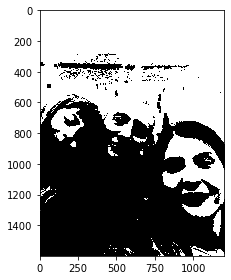

In [34]:
from skimage.morphology import erosion

io.imshow(erosion(img_mono).astype(float), cmap=plt.cm.gray)
io.show()

A la función anterior (`erosion`) le podemos pasar como parámetro opcional el elemento estructurante que podemos crear manualmente o con varias funciones predefinidas:

In [35]:
from skimage.morphology import square

print("{}\n".format(square(1)))
print("{}\n".format(square(2)))
print("{}\n".format(square(3)))

[[1]]

[[1 1]
 [1 1]]

[[1 1 1]
 [1 1 1]
 [1 1 1]]



In [36]:
from skimage.morphology import disk

print("{}\n".format(disk(1)))
print("{}\n".format(disk(2)))
print("{}\n".format(disk(3)))

[[0 1 0]
 [1 1 1]
 [0 1 0]]

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]



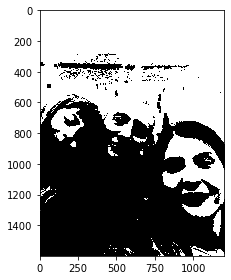

In [37]:
def filter_erosion(value):
    io.imshow(erosion(img_mono, disk(value)).astype(float), cmap=plt.cm.gray)
    io.show()
    
slider = IntSlider(min=1, max=32, step=1, value=1, continuous_update=False)
interactive(filter_erosion, value=slider)

### Dilatación $\oplus$

La dilatación ($\oplus$) es el efecto opuesto a la erosión. Recorremos la imagen con el elemento estructurante y marcamos el pixel como 1 si alguno de los elementos coincide.

<img src="img/dilation.png">

Podemos ver como funciona en la siguiente demo:

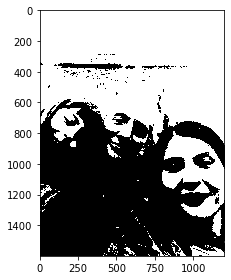

In [38]:
from skimage.morphology import dilation

def filter_dilation(value):
    io.imshow(dilation(img_mono, disk(value)).astype(float), cmap=plt.cm.gray)
    io.show()
    
slider = IntSlider(min=1, max=32, step=1, value=1, continuous_update=False)
interactive(filter_dilation, value=slider)

### Apertura $\circ$

Es el efecto de aplicar una erosión y después una dilatación

$$ A\circ B=(A\ominus B)\oplus B $$

Podemos ver como funciona. Al aplicar el elemento estructurante (circulo) sobre un cuadrado (azul oscuro) obtenemos un cuadrado con bordes redondeados (azul celeste):

<img src="img/opening.png">

Este filtro nos permite cerrar pequeños agujeros y modelar los bordes del objeto con el elemento estructurante.

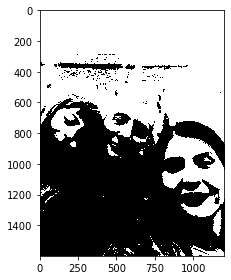

In [39]:
from skimage.morphology import opening

def filter_opening(value):
    io.imshow(opening(img_mono, disk(value)).astype(float), cmap=plt.cm.gray)
    io.show()
    
slider = IntSlider(min=1, max=64, step=1, value=1, continuous_update=False)
interactive(filter_opening, value=slider)

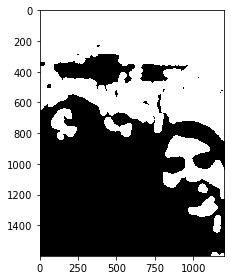

In [40]:
io.imshow(opening(img_mono, disk(20)).astype(float), cmap=plt.cm.gray)
io.show()

### Cierre $\bullet$

La función cierre consiste en aplicar una dilatación y posteriormente una erosión:

$$A\bullet B=(A\oplus B)\ominus B.$$

En este caso podemos ver que nos sirve para poder expandir figuras siguiendo el patrón estructurante como referencia:

<img src="img/closing.png">

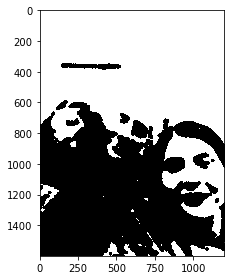

In [41]:
from skimage.morphology import closing

def filter_closing(value):
    io.imshow(closing(img_mono, disk(value)).astype(float), cmap=plt.cm.gray)
    io.show()
    
slider = IntSlider(min=1, max=64, step=1, value=12, continuous_update=False)
interactive(filter_closing, value=slider)

### Preguntas

* ¿Para qué nos pueden valer los operadores morfológicos?

## Análisis de blobs

Un problema clásico en visión por computador, es identificar blobs en la imagen. Una blob es un conjunto compacto de puntos. Es más fácil verlo con un ejemplo.

Vamos a cargar una foto del espacio e identificar las estrellas que aparecen:

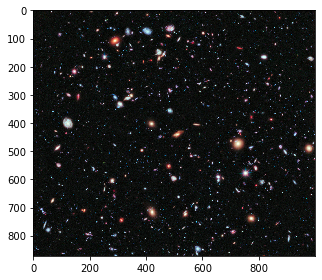

In [18]:
from skimage.data import hubble_deep_field

hubble = hubble_deep_field()
io.imshow(hubble)
io.show()

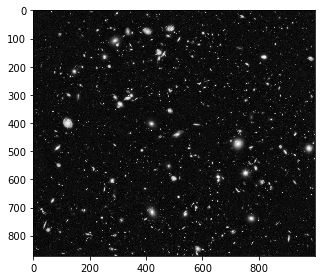

In [19]:
hubble_gray = rgb2gray(hubble)
io.imshow(hubble_gray)
io.show()

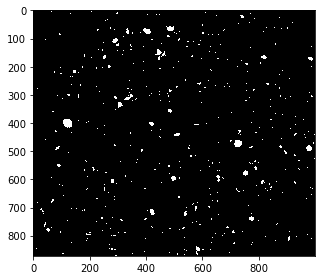

In [20]:
io.imshow(umbral_fijo(hubble_gray, 0.5).astype(float), cmap=plt.cm.gray)
io.show()

En este caso cada blobs es cada uno de las estrellas (u otros objetos) que aparezcan en la imagen.

Supongamos que nos piden contar cuantas estrellas aparecen en la imagen, para ello debemos contar todos los blobs que aparecen.

`skimage` dispone de varios métodos para realizar análisis de blobs, para este ejemplo utilizaremos `blob_doh` que es un método que hace un análisis estadístico de los datos mediante el análisis del hessiano (http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.blob_doh)

In [21]:
from skimage.feature import blob_doh
blobs = blob_doh(hubble_gray, max_sigma=10, threshold=0.015)

Por cada blob encontrado esta función nos devuelve una lista con su $centro_y$, $centro_x$ y su $radio$.

In [22]:
blobs

array([[661., 515.,   5.],
       [596., 498.,  10.],
       [199., 269.,   6.],
       [735., 243.,   5.],
       [166., 818.,  10.],
       [ 80., 602.,   5.],
       [556., 523.,   3.],
       [496., 385.,   5.],
       [684., 567.,   3.],
       [282., 783.,   4.],
       [ 10., 297.,   4.],
       [356., 484.,  10.],
       [333., 307.,  10.],
       [604., 280.,   9.],
       [128., 389.,   3.],
       [682., 580.,   3.],
       [171., 984.,  10.],
       [110., 548.,   4.],
       [848., 601.,   4.],
       [ 16., 404.,   4.],
       [541., 635.,   4.],
       [829., 269.,   3.],
       [283., 756.,   4.],
       [172., 509.,   3.],
       [166., 253.,   8.],
       [587., 327.,   4.],
       [699., 577.,   6.],
       [590., 655.,   7.],
       [483., 876.,   7.],
       [217., 146.,   8.],
       [560., 789.,   8.],
       [667., 226.,   2.],
       [477., 554.,   3.],
       [233., 131.,   3.],
       [779.,  53.,   8.],
       [260., 831.,   6.],
       [549.,  90.,   8.],
 

Mediante la siguiente función podemos dibujarlos junto a la imagen original.

In [23]:
def mostrar_blobs(img, blobs):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=plt.cm.gray)
    
    for blob in blobs:    
        y, x, r = blob
        c = plt.Circle((x, y), r, color='#FFFF00AA', linewidth=2, fill=False)
        ax.add_artist(c)

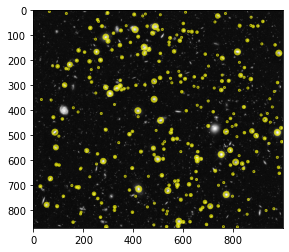

In [24]:
mostrar_blobs(hubble_gray, blobs)

In [25]:
print("{} estrellas.".format(len(blobs)))

284 estrellas.


Podemos jugar con algunos de sus parámetros:

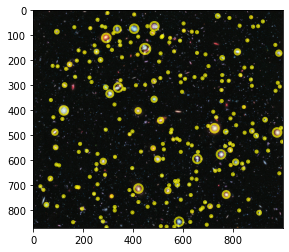

In [26]:
def filter_blobs(threshold, max_sigma):
    blobs = blob_doh(hubble_gray, max_sigma=max_sigma, threshold=threshold)
    mostrar_blobs(hubble, blobs)
    
slider_threshold = FloatSlider(min=0, max=0.05, step=0.01, value=0.01, continuous_update=False)
slider_sigma = FloatSlider(min=1, max=60, step=1, value=30, continuous_update=False)

interactive(filter_blobs, threshold=slider_threshold, max_sigma=slider_sigma)

# Si bajo sigma se queda con las pequenas
# Si bajo

La técnicas de detección de blobs son ampliamente usadas, desde el ejemplo de contar estrellas, a contar células en imágenes de laboratorio a contar posibles fallos en el material en un entorno industrial. 